In [379]:
%matplotlib inline
#importaciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline


[[1.  0.  1.  ... 1.  1.  0.5]
 [0.  0.  0.  ... 1.  1.  1. ]
 [1.  0.  0.5 ... 0.  1.  0.5]
 ...
 [0.  0.5 0.  ... 0.  0.  0.5]
 [0.5 0.5 1.  ... 0.  1.  0.5]
 [1.  0.5 1.  ... 0.  0.  0.5]]

 [ 0  1  1 ...  1  1 -1]


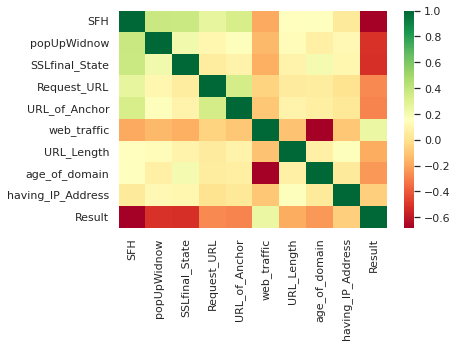

In [380]:
data=pd.read_csv("pishingdata.csv")
#eliminamos primera fila id
del(data['id'])
data.head()

correlacion=data.corr()
correlacion['Result'].sort_values(ascending=False)
sns.heatmap(correlacion,xticklabels=correlacion.columns.values,yticklabels=correlacion.columns.values,cmap='RdYlGn')

# se crea la matriz de valores y las etiquetas de los clusters
x = data.to_numpy()[:, :-1]
clusters = data.to_numpy()[:, -1]


def minmax_norm(df_input):
    return (x - x.min()) / ( x.max() - x.min())

df_minmax_norm = minmax_norm(x)
x=df_minmax_norm
#print(df_minmax_norm)


print(x)
print("\n",clusters)





In [381]:

# CLusters a probar
def cluster_ac(x, n_clusters):
    ac = cluster.AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    ac.fit(x)
    return ac.labels_
def cluster_dbscan(x):
    db = cluster.DBSCAN(min_samples=50,metric='euclidean', eps=8)
    db.fit(x)
    return db.labels_

def cluster_kmeans(x, n_clusters):
    return cluster.k_means(x, n_clusters=n_clusters)[1]


In [382]:


# Reduccion de caracteristicas
def reducir_dim(x, ndim):
    pca = PCA(n_components=ndim)
    return pca.fit_transform(x)

def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)
    
def reducir_dataset(x, how="original"):
    if how == "pca":
        res = reducir_dim(x, ndim=2)
    elif how == "tsne":
        res = reducir_dim_tsne(x, ndim=2)   
    else:
        res = x[:, :2]

    return res
x_pca = reducir_dataset(x, how ="pca")
x_tsne = reducir_dataset(x, how ="tsne")


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


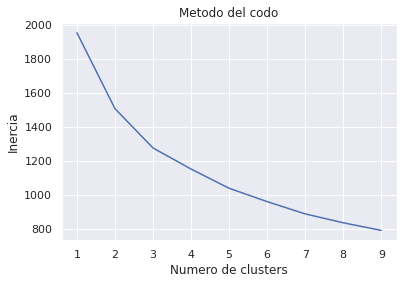

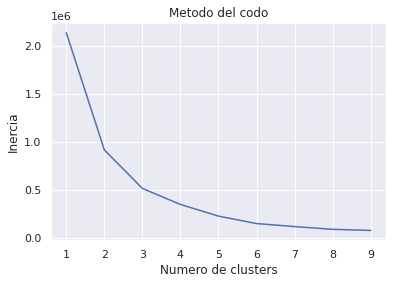

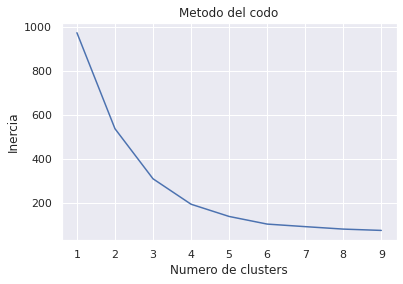

In [383]:

# Con reduccion de dimensiones
from sklearn.cluster import KMeans
def calcular_codo(x, c):

   wcss = []
   for i in range(1, 10):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(x)
      wcss.append(kmeans.inertia_)

   # Grafica de la suma de las distancias
   plt.plot(range(1, 10), wcss)
   plt.title('Metodo del codo')
   plt.xlabel('Numero de clusters')
   plt.ylabel('Inercia')
   plt.show()

calcular_codo(x, clusters)
calcular_codo(x_tsne, clusters)
calcular_codo(x_pca, clusters)


In [384]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    sns.scatterplot(data=res, x="x", y="y", hue="clusters", ax=ax[0,0],legend="full")
    ax[0,0].set_title('Ground Truth')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_ac", ax=ax[0,1], legend="full")
    ax[0,1].set_title('Agglomerative Clustering')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_km", ax=ax[1,0], legend="full")
    ax[1,0].set_title('K-Means')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_db", ax=ax[1,1], legend="full")
    ax[1,1].set_title('DBSCAN')
    
#mostrar_resultados(results)

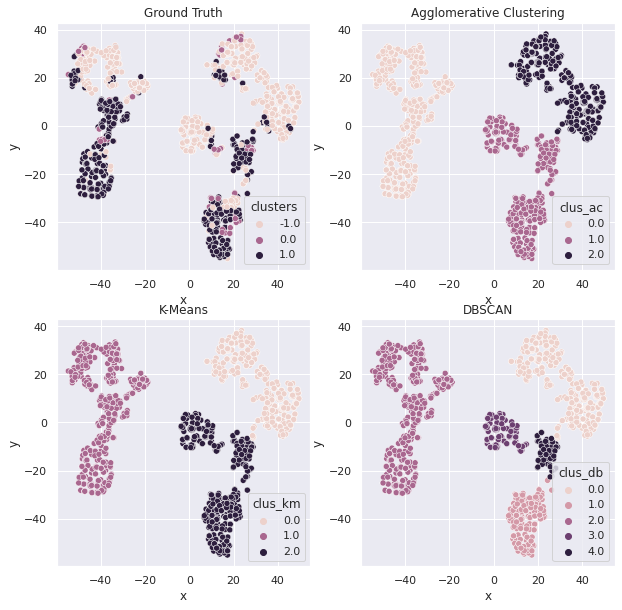

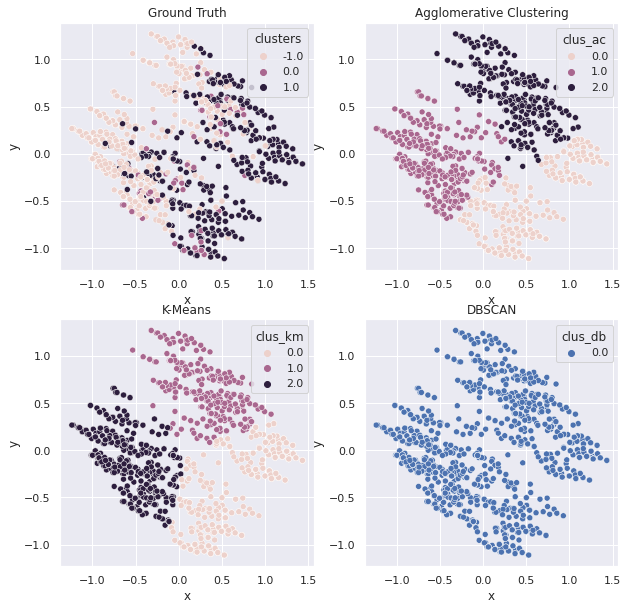

In [385]:

# se ejecutan algoritmos de clusterings con la configuración que le parezca más idónea
clus_ac = cluster_ac(x_tsne, 3)
clus_km = cluster_kmeans(x_tsne, 3)
clus_db = cluster_dbscan(x_tsne)

# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([x_tsne, clusters, clus_ac,clus_km, clus_db]), 
                     columns=["x", "y", "clusters", "clus_ac", "clus_km", "clus_db"])



def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    sns.scatterplot(data=res, x="x", y="y", hue="clusters", ax=ax[0,0],legend="full")
    ax[0,0].set_title('Ground Truth')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_ac", ax=ax[0,1], legend="full")
    ax[0,1].set_title('Agglomerative Clustering')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_km", ax=ax[1,0], legend="full")
    ax[1,0].set_title('K-Means')
    sns.scatterplot(data=res, x="x", y="y", hue="clus_db", ax=ax[1,1], legend="full")
    ax[1,1].set_title('DBSCAN')



mostrar_resultados(results)

#Con PCA
clus_ac = cluster_ac(x_pca, 3)
clus_km = cluster_kmeans(x_pca, 3)
clus_db = cluster_dbscan(x_pca)

# se concatenan los resultados en un dataframe
results = pd.DataFrame(np.column_stack([x_pca, clusters, clus_ac,clus_km, clus_db]), 
                     columns=["x", "y", "clusters", "clus_ac", "clus_km", "clus_db"])

mostrar_resultados(results)





